Ref:
https://medium.com/@amalia.wulandiari/ikea-product-analysis-and-price-prediction-using-linear-regression-644e52542f35

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('ikea.csv')

In [6]:
data.head(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,7,60155602,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN


In [7]:
data.shape

(3694, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


# Data Cleaning

In [9]:
# remove Unnamed: 0
data = data.drop(['Unnamed: 0'], axis=1)

In [10]:
data.isna().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [11]:
# Check if there any duplicated values
data.duplicated().sum()

0

In [12]:
data[data['depth'].isna()]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN
15,29304826,TOMMARYD,Bar furniture,695.0,No old price,True,https://www.ikea.com/sa/en/p/tommaryd-table-an...,No,"Table, 130x70/105 cm",Maja Ganszyniec,NaN,105.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,9331109,PAX,Wardrobes,3935.0,"SR 4,195",True,https://www.ikea.com/sa/en/p/pax-corner-wardro...,No,"Corner wardrobe, 113/271/113x...",Ehlén Johansson/IKEA of Sweden,NaN,236.0,270.0
3607,79331870,PAX / GRIMO/VIKEDAL,Wardrobes,4230.0,No old price,True,https://www.ikea.com/sa/en/p/pax-grimo-vikedal...,No,"Corner wardrobe, 210/160x236 cm",IKEA of Sweden/Ola Wihlborg/Ehlén Johansson,NaN,236.0,160.0
3614,69331074,PAX,Wardrobes,2945.0,No old price,True,https://www.ikea.com/sa/en/p/pax-corner-wardro...,No,"Corner wardrobe, 160/163x236 cm",Ehlén Johansson/IKEA of Sweden,NaN,236.0,162.0
3626,49325286,PLATSA,Wardrobes,502.0,SR 530,True,https://www.ikea.com/sa/en/p/platsa-open-shelv...,No,"Open shelving unit, 160x40x63 cm",Ola Wihlborg/IKEA of Sweden,NaN,NaN,NaN


In [13]:
# Count the median value for depth for each categories
median_depth = data.groupby(['category'])['depth'].median().reset_index()
median_depth.columns = ['category', 'MedianDepth']

# Count the median value for depth for each categories
median_height = data.groupby(['category'])['height'].median().reset_index()
median_height.columns = ['category', 'MedianHeight']

# Count the median value for depth for each categories
median_width = data.groupby(['category'])['width'].median().reset_index()
median_width.columns = ['category', 'MedianWidth']

In [14]:
# merge all 3
median_data = pd.merge(pd.merge(median_depth, median_height, on='category'), median_width, on='category')
median_data

,category,MedianDepth,MedianHeight,MedianWidth
0,Bar furniture,47.0,102.0,48.0
1,Beds,88.0,84.0,140.0
2,Bookcases & shelving units,36.0,147.0,81.0
3,Cabinets & cupboards,38.0,101.0,80.0
4,Café furniture,46.5,77.5,53.0
5,Chairs,53.5,77.0,67.0
6,Chests of drawers & drawer units,47.0,73.0,67.0
7,Children's furniture,45.0,67.0,56.0
8,Nursery furniture,44.0,86.5,60.0
9,Outdoor furniture,67.0,73.0,62.5


In [15]:
df = pd.merge(data, median_data, on = 'category')

In [16]:
df

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,MedianDepth,MedianHeight,MedianWidth
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,47.0,102.0,48.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,47.0,102.0,48.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,47.0,102.0,48.0
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,47.0,102.0,48.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,47.0,102.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0,57.0,236.0,150.0
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0,57.0,236.0,150.0
3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0,57.0,236.0,150.0
3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0,57.0,236.0,150.0


In [17]:
# replace the na with median values
df['depth'] = df['depth'].fillna(df['MedianDepth'])
df['height'] = df['height'].fillna(df['MedianHeight'])
df['width'] = df['width'].fillna(df['MedianWidth'])

In [18]:
df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
MedianDepth          0
MedianHeight         0
MedianWidth          0
dtype: int64

In [19]:
df.drop(['MedianHeight', 'MedianDepth', 'MedianWidth'], axis = 'columns', inplace = True)

In [20]:
df

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,102.0,48.0
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,236.0,91.0
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,236.0,135.0
3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,236.0,175.0
3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,236.0,178.0


In [21]:
df['volume'] = df['depth'] * df['height'] * df['width']

In [22]:
df['old_price'].unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

In [23]:
# New Column for price difference
df['price_diff'] = (df['old_price'] != 'No old price').astype(int)

In [24]:
df

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume,price_diff
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0,237303.0,0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0,394800.0,0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,102.0,48.0,230112.0,0
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0,0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,236.0,91.0,1073800.0,1
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,236.0,135.0,1593000.0,1
3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,236.0,175.0,2065000.0,1
3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,236.0,178.0,2100400.0,1


In [25]:
# Check the old price and price in case of pack items
data[data['old_price'].str.contains('pack')]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
155,60299691,BRYNILEN,Beds,30.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/brynilen-leg-oak-...,No,"Leg, 10 cm",Ola Wihlborg,NaN,NaN,NaN
185,20299688,BRENNÅSEN,Beds,30.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/brennasen-leg-bla...,No,"Leg, 10 cm",Ola Wihlborg,7.0,NaN,7.0
191,40299687,BURFJORD,Beds,40.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/burfjord-leg-oak-...,No,"Leg, 10 cm",Ola Wihlborg,55.0,NaN,55.0
204,10309616,BÅTSFJORD,Beds,30.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/batsfjord-leg-bir...,No,"Leg, 10 cm",Ehlén Johansson,NaN,NaN,NaN
222,70299695,BJORLI,Beds,40.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/bjorli-leg-stainl...,Yes,"Leg, 10 cm",Ola Wihlborg,NaN,NaN,NaN
461,335885,SKÅDIS,Bookcases & shelving units,6.0,SR 10/4 pack,True,https://www.ikea.com/sa/en/p/skadis-connector-...,No,Connector for ALGOT,Eva Lilja Löwenhielm,2.0,4.0,5.0
2127,20386505,SJÄLLAND,Outdoor furniture,356.0,SR 445/2 pack,True,https://www.ikea.com/sa/en/p/sjaelland-table-t...,Yes,"Table top, outdoor, 85x72 cm",David Wahl,NaN,NaN,72.0
2315,20303751,NORSBORG,Sofas & armchairs,80.0,SR 100/4 pack,True,https://www.ikea.com/sa/en/p/norsborg-leg-birc...,No,Leg,Ehlén Johansson,NaN,18.0,NaN
2360,80382608,NORSBORG,Sofas & armchairs,140.0,SR 175/2 pack,True,https://www.ikea.com/sa/en/p/norsborg-cover-fo...,Yes,Cover for armrest,803.826.08 This cover's ability to resist abra...,NaN,NaN,NaN
2448,60382628,NORSBORG,Sofas & armchairs,80.0,SR 100/4 pack,True,https://www.ikea.com/sa/en/p/norsborg-leg-meta...,No,"Leg, 18 cm",603.826.28 These legs in nickel-plated steel g...,NaN,18.0,NaN


In [26]:
def modify_old_price(df):

  if df['old_price'] == 'No old price':
     return df['price']

  elif df['old_price'][-4:] != 'pack':
     return float(str(df['old_price'])[3:].replace(',',''))

  elif df['old_price'][-4:] == 'pack':
     return float(str(df['old_price']).split('/')[0].split(' ')[1])

In [27]:
# apply the function
df['old_price'] = df.apply(modify_old_price, axis=1)
df[['price', 'old_price']].head()

,price,old_price
0,265.0,265.0
1,995.0,995.0
2,2095.0,2095.0
3,69.0,69.0
4,225.0,225.0


In [28]:
df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
volume               0
price_diff           0
dtype: int64

In [29]:
df[df['old_price'].isnull()]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume,price_diff


In [30]:
# Create column to calculate the different amount between price and old_price
df['diff_amount'] = df['old_price'] - df['price']

In [31]:
df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
volume               0
price_diff           0
diff_amount          0
dtype: int64

In [32]:
# Correlation matrix
corr = df.corr()
corr

,item_id,price,old_price,sellable_online,depth,height,width,volume,price_diff,diff_amount
item_id,1.000000,0.062683,0.063274,0.015255,0.013912,0.042289,0.047008,0.051491,0.040748,0.030310
price,0.062683,1.000000,0.993866,0.040226,0.435003,0.229950,0.602747,0.648516,0.095033,0.351772
old_price,0.063274,0.993866,1.000000,0.040125,0.441356,0.227627,0.608043,0.650203,0.160519,0.453140
sellable_online,0.015255,0.040226,0.040125,1.000000,0.039618,0.040584,0.064465,0.048055,0.024181,0.015384
depth,0.013912,0.435003,0.441356,0.039618,1.000000,-0.077826,0.460812,0.621798,0.090364,0.229377
height,0.042289,0.229950,0.227627,0.040584,-0.077826,1.000000,0.332318,0.482914,0.085591,0.073167
width,0.047008,0.602747,0.608043,0.064465,0.460812,0.332318,1.000000,0.827089,0.137429,0.288148
volume,0.051491,0.648516,0.650203,0.048055,0.621798,0.482914,0.827089,1.000000,0.112497,0.276075
price_diff,0.040748,0.095033,0.160519,0.024181,0.090364,0.085591,0.137429,0.112497,1.000000,0.592647
diff_amount,0.030310,0.351772,0.453140,0.015384,0.229377,0.073167,0.288148,0.276075,0.592647,1.000000


<AxesSubplot:>

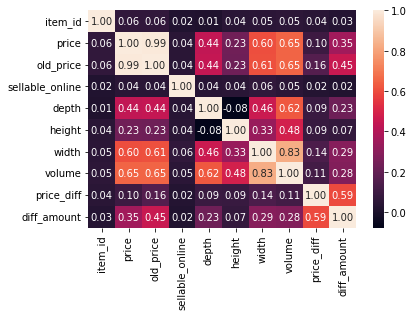

In [33]:
sns.heatmap(corr, annot=True, fmt='.2f')

volume has highest correlation with width, followed with depth then height. volume also correlated with price and old_price. 
price and old_price has higher correlation with width rather than two other dimension unit [ depth and height ], and both price and old_price are highly correlated with each others and obviously with price_diff.

In [34]:
df.describe()

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
count,3.694000e+03,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3.694000e+03,3694.000000,3694.000000
mean,4.863240e+07,1078.208419,1125.081483,55.880211,98.524228,105.420953,7.058127e+05,0.177044,46.873064
std,2.888709e+07,1374.652494,1443.499807,26.683012,55.201894,68.800229,9.146756e+05,0.381757,170.543142
min,5.848700e+04,3.000000,3.000000,1.000000,1.000000,1.000000,4.000000e+01,0.000000,0.000000
25%,2.039057e+07,180.900000,195.000000,40.000000,73.000000,60.000000,2.042400e+05,0.000000,0.000000
50%,4.928808e+07,544.700000,550.000000,46.500000,80.000000,80.000000,3.072000e+05,0.000000,0.000000
75%,7.040357e+07,1429.500000,1495.000000,65.000000,105.000000,141.000000,8.640000e+05,0.000000,0.000000
max,9.993262e+07,9585.000000,9985.000000,257.000000,700.000000,420.000000,1.362900e+07,1.000000,1997.000000


**Conclusion:**

price_diff is boolean with [0] for not a no different between price and old_price or it is a new product, and [1] if the value betweenprice and old_price is different.
All the other variables are bigger than the median except item_id.

# Exploratory Data Analysis (EDA)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   float64
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              3694 non-null   float64
 11  height             3694 non-null   float64
 12  width              3694 non-null   float64
 13  volume             3694 non-null   float64
 14  price_diff         3694 non-null   int64  
 15  diff_amount        3694 non-null   float64
dtypes: bool(1), float64(7), 

In [36]:
df_num_cols = df.drop(labels = ['name','category','link', 'other_colors', 'designer', 'sellable_online', 'short_description'], axis = 1)
df_cat_cols = df.drop(labels = ['item_id','depth','height', 'width','volume','price', 'old_price',  'diff_amount', 'price_diff'], axis = 1)

In [37]:
df_num_cols.head()

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
0,90420332,265.0,265.0,47.0,99.0,51.0,237303.0,0,0.0
1,368814,995.0,995.0,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,2095.0,2095.0,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,69.0,69.0,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,225.0,225.0,60.0,43.0,74.0,190920.0,0,0.0


In [38]:
df_cat_cols.head()

,name,category,sellable_online,link,other_colors,short_description,designer
0,FREKVENS,Bar furniture,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen
1,NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette
2,NORDVIKEN / NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette
3,STIG,Bar furniture,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz
4,NORBERG,Bar furniture,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen


## Univariate analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(close=None, block=None)>

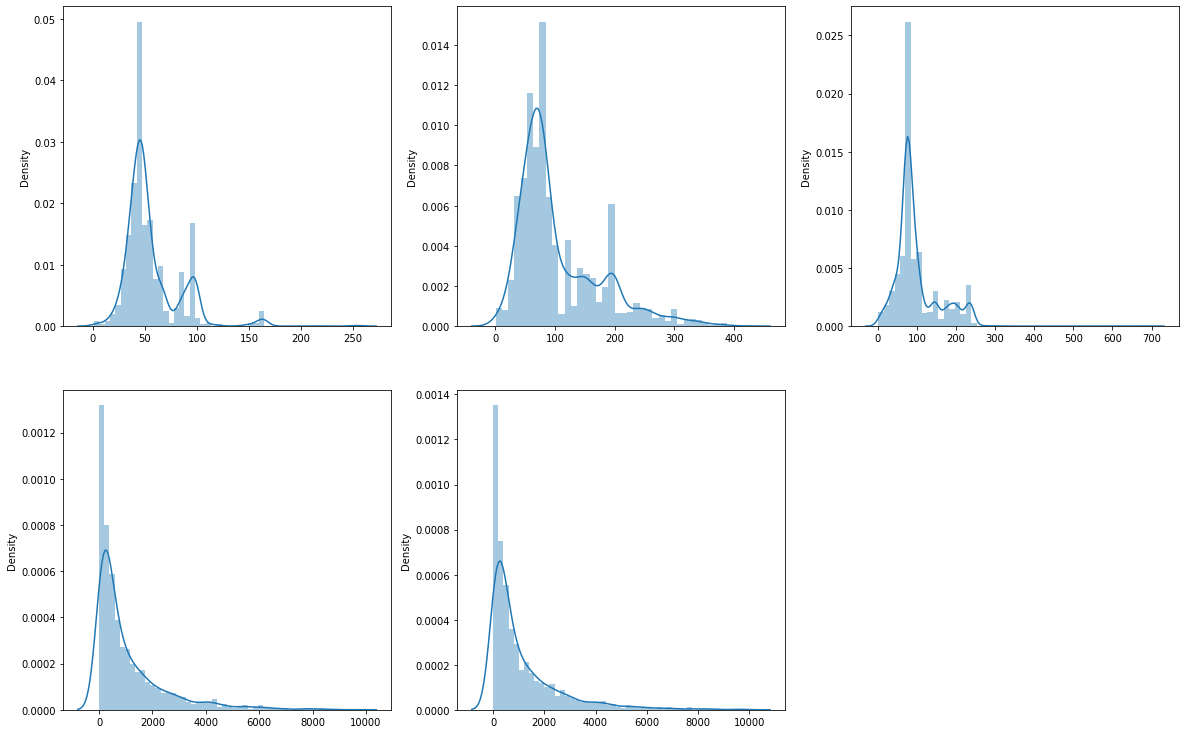

In [39]:
plt.figure(figsize = (20,20))

plt.subplot(3, 3, 1)
sns.distplot(x=df_num_cols['depth'])

plt.subplot(3, 3, 2)
sns.distplot(x=df_num_cols['width'])

plt.subplot(3, 3, 3)
sns.distplot(x=df_num_cols['height'])

plt.subplot(3, 3, 4)
sns.distplot(x=df_num_cols['price'])

plt.subplot(3, 3, 5)
sns.distplot(x=df_num_cols['old_price'])

plt.show

skewed to the right, which means the mean is greater than the median, and dominated with product with lower price, and smaller size.

In [40]:
#Proportion Between Online and Offline Sales
df.sellable_online.value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

In [41]:
# Create new dataframe df_online

df_online = pd.DataFrame({'Sellable Online': ['True', 'False'],
                          'Total': [3666, 28]})
df_online

,Sellable Online,Total
0,True,3666
1,False,28


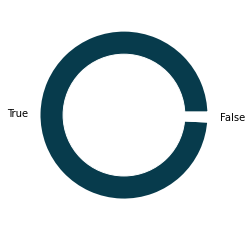

In [42]:
# Visualizing the df_online dataframe with donut

# Define data
names = df_online['Sellable Online']
size = df_online['Total']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, colors=['#073b4c','#ffd166'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [43]:
# Product With More Than 1 Color
df.other_colors.value_counts()

No     2182
Yes    1512
Name: other_colors, dtype: int64

In [44]:
df_colors = pd.DataFrame({'Other Colors': ['No', 'Yes'],
                          'Total': [2182, 1512]})

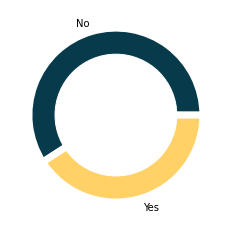

In [45]:
# Visualizing the df_colors dataframe with donut

# Define data
names = df_colors['Other Colors']
size = df_colors['Total']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, colors=['#073b4c','#ffd166'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [46]:
# price_diff proportion

df.price_diff.value_counts()

0    3040
1     654
Name: price_diff, dtype: int64

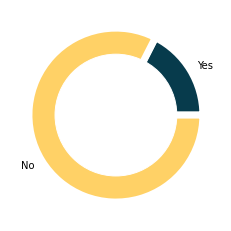

In [47]:
# Visualizing the df_price dataframe with donut
df_price = pd.DataFrame({'Price Diff': ['Yes', 'No'],
                          'Total': [645, 3040]})

# Define data
names = df_price['Price Diff']
size = df_price['Total']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, colors=['#073b4c','#ffd166'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Product that has no price difference, or has no old_price, are much more than product that has price difference. It means, IKEA prefer to launch a new line of product to attract more customer and stay strong in such a competitive market.

Product that has other color options and product that only has one color, is almost has the same proportion. Most of IKEA products are available online.

In [48]:

# Create new dataframe short the category

top_cat = (df_cat_cols
            .groupby('category') 
            .agg(count=('category', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            )
top_cat

,category,count
14,Tables & desks,612
2,Bookcases & shelving units,548
5,Chairs,481
12,Sofas & armchairs,428
3,Cabinets & cupboards,292
16,Wardrobes,236
9,Outdoor furniture,216
1,Beds,208
13,TV & media furniture,190
6,Chests of drawers & drawer units,125


IKEA mostly produced Table and Desks with more than 600 different products. Followed by Bookcases and Shelving Units, and then Chairs. The least product category produced by IKEA is Room Dividers, well probably because customers doesn’t need it as much as the TOP 3 Product Categories.

In [49]:

# Create new dataframe short the designer

top_des = (df_cat_cols
            .groupby('designer') 
            .agg(count=('designer', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            .head(20)
            )
top_des

,designer,count
192,IKEA of Sweden,828
138,Ehlén Johansson,161
163,Francis Cayouette,151
344,Ola Wihlborg,134
279,K Hagberg/M Hagberg,122
270,Jon Karlsson,120
145,Ehlén Johansson/IKEA of Sweden,75
110,Carina Bengs,75
209,IKEA of Sweden/Ehlén Johansson,70
189,Henrik Preutz,70


In [50]:
# Create new dataframe short the name

top_sel = (df_cat_cols
           .groupby('name')
           .agg(count=('name', 'count'))
           .reset_index()
           .sort_values('count', ascending = False)
           .head(20))
top_sel

,name,count
30,BESTÅ,173
412,PAX,111
163,GRÖNLID,83
22,BEKANT,74
545,TROFAST,74
216,IVAR,69
578,VIMLE,63
95,EKET,61
431,PLATSA,57
279,LIDHULT,52


## Bivariate Analysis

In [51]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume,price_diff,diff_amount
0,90420332,FREKVENS,Bar furniture,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0,237303.0,0,0.0
1,368814,NORDVIKEN,Bar furniture,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,STIG,Bar furniture,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,NORBERG,Bar furniture,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0,0,0.0


<AxesSubplot:xlabel='old_price', ylabel='price'>

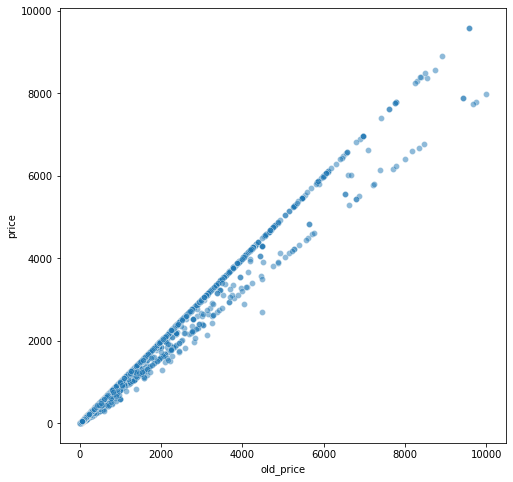

In [52]:
# Visualize price vs old_price

plt.figure(figsize = (8,8))
sns.scatterplot(data=df, x="old_price", y="price", alpha = 0.5)


There are linear connection between price and old_price, the higher the price the value of old_price also increase.

<AxesSubplot:xlabel='volume', ylabel='price'>

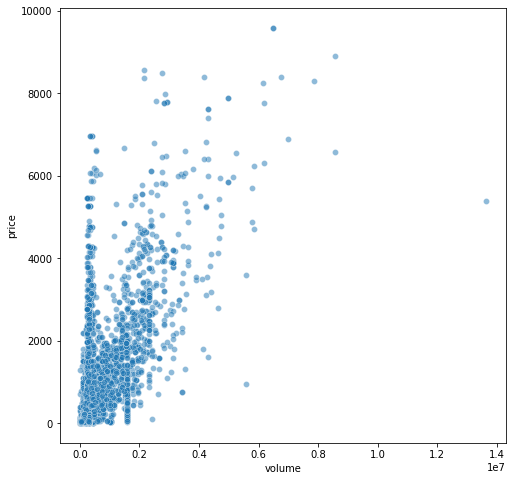

In [53]:
# Visualizing price vs volume
plt.figure(figsize = (8,8))
sns.scatterplot(data=df, x="volume", y="price", alpha = 0.5)

Based on above chart, product sold in IKEA are dominated with small volume product with low price range.

In [54]:
# price vs category
cat_price = (df.groupby(['category'])['price'] 
            .agg(np.mean)
            .reset_index()
            .sort_values('price', ascending=False)
            )
cat_price

,category,price
16,Wardrobes,2162.141949
12,Sofas & armchairs,2004.016355
1,Beds,1647.432692
14,Tables & desks,1129.395425
11,"Sideboards, buffets & console tables",1068.086957
5,Chairs,1048.932640
10,Room dividers,932.000000
9,Outdoor furniture,859.826852
3,Cabinets & cupboards,789.015753
0,Bar furniture,679.553191


In [55]:
top_cat

,category,count
14,Tables & desks,612
2,Bookcases & shelving units,548
5,Chairs,481
12,Sofas & armchairs,428
3,Cabinets & cupboards,292
16,Wardrobes,236
9,Outdoor furniture,216
1,Beds,208
13,TV & media furniture,190
6,Chests of drawers & drawer units,125


In [56]:
cat_price['price'].mean()

941.756984154427

<function matplotlib.pyplot.show(close=None, block=None)>

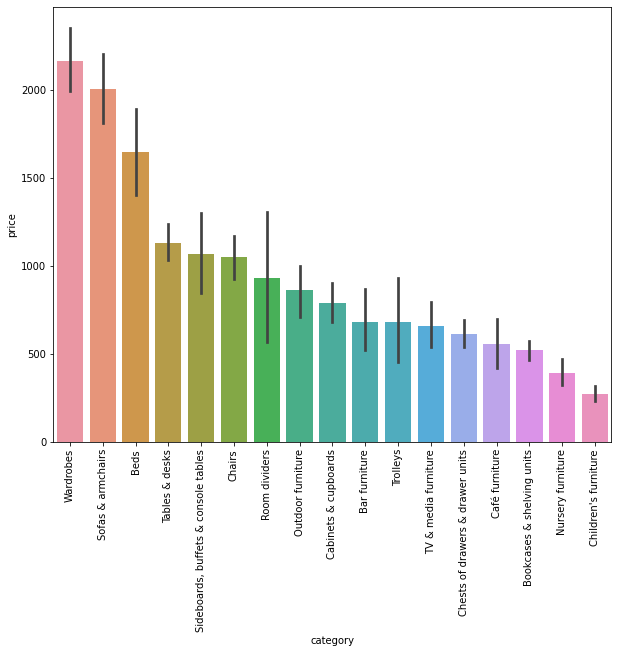

In [57]:
plt.figure(figsize=[10, 8])

sns.barplot(data=df, y='price', x='category', order=cat_price['category'])

plt.xticks(rotation=90)
plt.show

Based on above chart, eventhough wardrobe is rank 6 from overall sales, it has the highest overall mean value on price than other.

<AxesSubplot:xlabel='price_diff', ylabel='price'>

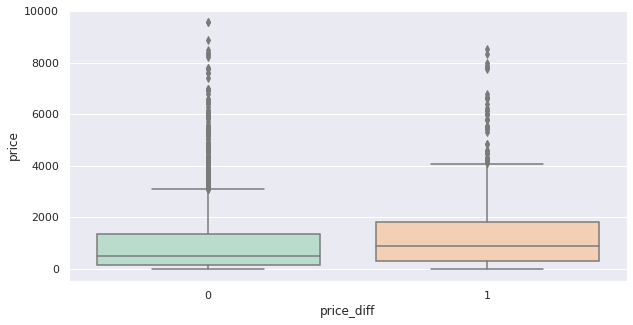

In [58]:
#Visualizing the price_diff vs price

plt.figure(figsize = (10,5))

sns.set(style="darkgrid")
sns.boxplot(x=df["price_diff"], y=df["price"], palette="Pastel2")

Based on figure above, product that has price difference between price and old_price has almost the same median value with product that doesn't has price differences. Median value also represent the highest probability value showed from the data.

<AxesSubplot:xlabel='sellable_online', ylabel='price'>

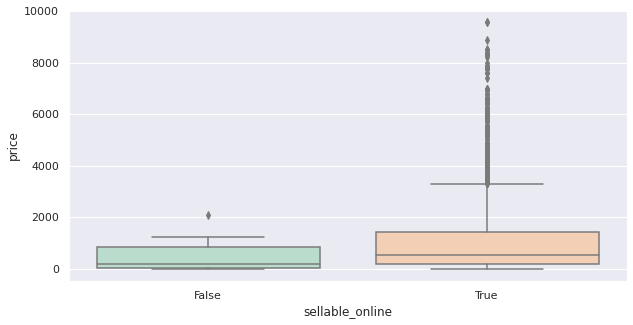

In [59]:
# visulaizing sellable vs price

plt.figure(figsize = (10,5))

sns.set(style="darkgrid")
sns.boxplot(x=df["sellable_online"], y=df["price"], palette="Pastel2")

Based on figure above, product that available online or sellable_online tends to have higher product price probability than product that is not available online.

<AxesSubplot:xlabel='other_colors', ylabel='price'>

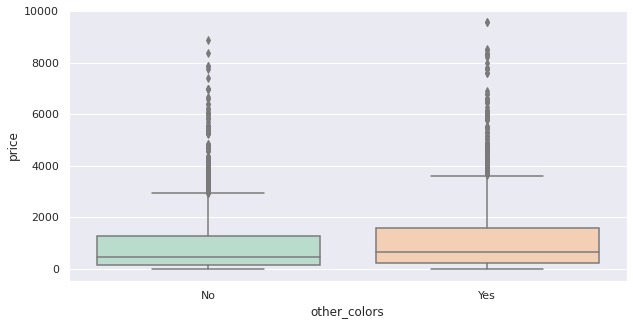

In [60]:
#Visualizing the other_colors vs price

plt.figure(figsize = (10,5))

sns.set(style="darkgrid")
sns.boxplot(x=df["other_colors"], y=df["price"], palette="Pastel2")

Based on figure above, product that has other colors, has higher product price probability. Although there are only small price differences beween product with other_colors and not.

other_colors availability kind of affect the product price but not that much, eventhough, product with more than one color option, still has a chance of higher product price probability. Product that available online or sellable_online, also has higher product price probability than product that is not available online.

Almost all product in IKEA are available online, but the other colors availability of the product is not that much. Probably because IKEA more focused on functional home products at the lowest prices, so they tend to create as many as product types, and not the varieties of colors from one product.

<function matplotlib.pyplot.show(close=None, block=None)>

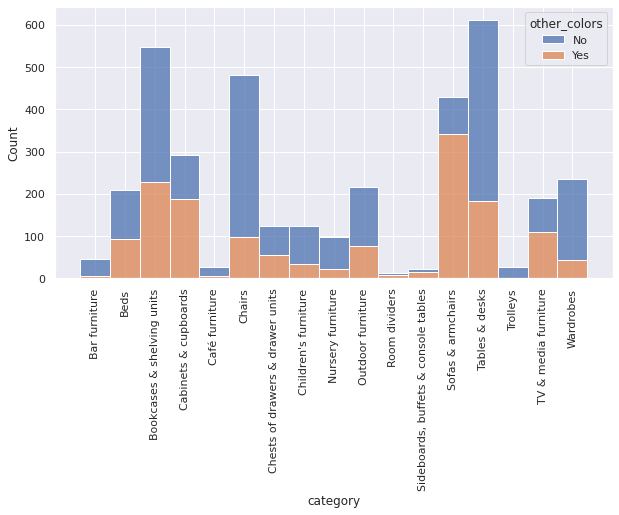

In [61]:
# Visualizing the category vs other_colors

plt.figure(figsize = (10,5))

sns.histplot(data = df,x= "category",hue = 'other_colors',multiple='stack')

plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

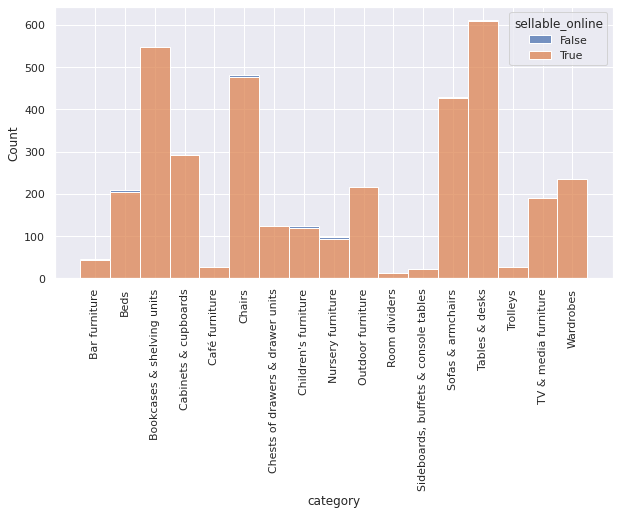

In [62]:
#Visualizing the category vs sellable_online

plt.figure(figsize = (10,5))

sns.histplot(data = df,x= "category",hue = 'sellable_online',multiple='stack')

plt.xticks(rotation=90)
plt.show

# Modeling

In [63]:
df_num_cols.head(5)

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
0,90420332,265.0,265.0,47.0,99.0,51.0,237303.0,0,0.0
1,368814,995.0,995.0,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,2095.0,2095.0,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,69.0,69.0,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,225.0,225.0,60.0,43.0,74.0,190920.0,0,0.0


In [64]:
df_cat_cols.head(5)

,name,category,sellable_online,link,other_colors,short_description,designer
0,FREKVENS,Bar furniture,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen
1,NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette
2,NORDVIKEN / NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette
3,STIG,Bar furniture,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz
4,NORBERG,Bar furniture,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen


In [65]:
df_num_cols = df_num_cols.drop(['item_id', 'old_price'], axis = 1)  # old_price was highely correlated with price

In [66]:
df_cat_cols = df_cat_cols.drop(['link', 'short_description'], axis = 1) # unused columns

In [67]:
# Encoding the df_categoricals, for modeling

from sklearn.preprocessing import LabelEncoder

col = list(df_cat_cols)


In [68]:
col

['name', 'category', 'sellable_online', 'other_colors', 'designer']

In [69]:
df_cat_cols[col] = df_cat_cols[col].apply(LabelEncoder().fit_transform)
df_cat_cols.head()

,name,category,sellable_online,other_colors,designer
0,123,0,1,0,333
1,387,0,0,0,163
2,390,0,0,0,163
3,493,0,1,1,189
4,380,0,1,0,310


In [70]:
# combining between df_numericals with df_categoricals

df_updated = pd.concat([df_cat_cols, df_num_cols], axis=1, join='inner')

In [71]:
df_updated.head()

,name,category,sellable_online,other_colors,designer,price,depth,height,width,volume,price_diff,diff_amount
0,123,0,1,0,333,265.0,47.0,99.0,51.0,237303.0,0,0.0
1,387,0,0,0,163,995.0,47.0,105.0,80.0,394800.0,0,0.0
2,390,0,0,0,163,2095.0,47.0,102.0,48.0,230112.0,0,0.0
3,493,0,1,1,189,69.0,50.0,100.0,60.0,300000.0,0,0.0
4,380,0,1,0,310,225.0,60.0,43.0,74.0,190920.0,0,0.0


In [72]:
from sklearn.model_selection import train_test_split

feature = df_updated.drop(columns='price')
target = df_updated[['price']]

X_pretrain, X_test, y_pretrain, y_test = train_test_split(feature, target, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_pretrain,y_pretrain, test_size = 0.2, random_state = 42 )

In [73]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)
X
     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,name,category,sellable_online,other_colors,designer,depth,height,width,volume,price_diff,diff_amount
3126,1.0,392,14,1,0,172,46.0,74.0,95.0,323380.0,0,0.0
2817,1.0,22,14,1,1,289,110.0,74.0,75.0,610500.0,0,0.0
743,1.0,95,2,1,1,272,35.0,180.0,210.0,1323000.0,1,118.0
2808,1.0,447,14,1,1,202,46.0,75.0,78.0,269100.0,1,55.0
1500,1.0,89,5,1,0,209,53.5,77.0,67.0,276006.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1.0,545,8,1,0,366,44.0,52.0,94.0,215072.0,0,0.0
2513,1.0,578,12,1,1,138,98.0,83.0,196.0,1594264.0,0,0.0
2400,1.0,163,12,1,1,165,98.0,104.0,267.0,2721264.0,0,0.0
3432,1.0,410,13,1,1,192,35.0,64.0,16.0,35840.0,0,0.0


In [74]:

vif_df = pd.DataFrame([vif(X.values, i)  for i in range(X.shape[1])], index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,name,1.092195
2,category,1.084473
3,sellable_online,1.016534
4,other_colors,1.108276
5,designer,1.035341
6,depth,2.482759
7,height,2.029962
8,width,3.393421
9,volume,6.521870
10,price_diff,1.563654


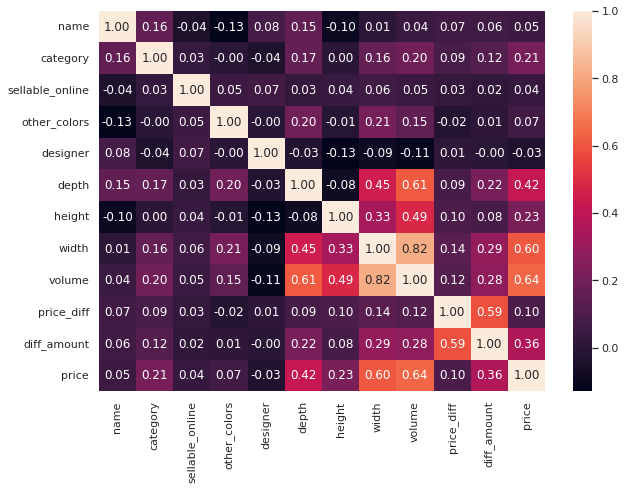

In [75]:
# heatmap correlation
price_train = pd.concat([X_train, y_train], axis=1)
corr = price_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()
     

Based on above heatmap, we choose to drop width, height and depth, and decided to keep volume. Column volume already represent product size and/or dimension.

In [76]:
# drop redundant features
X_train = X_train.drop(columns=['width', 'height', 'depth'])
X_val= X_val.drop(columns=['width', 'height', 'depth'])
X_test = X_test.drop(columns=['width', 'height', 'depth'])

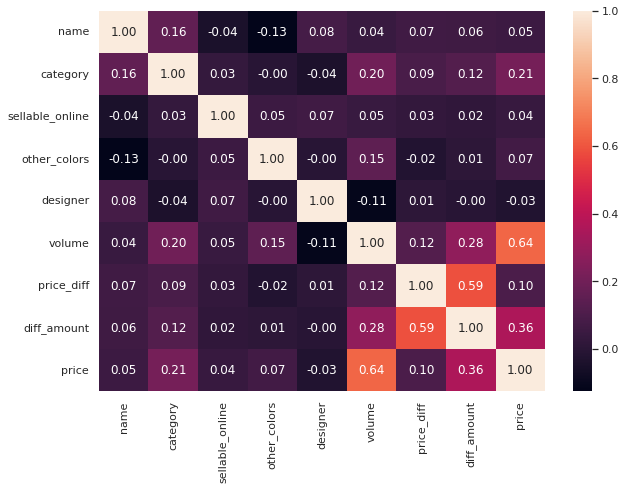

In [77]:
# heatmap correlation
price_train = pd.concat([X_train, y_train], axis=1)
corr = price_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()
     

In [78]:
# Checking the VIF score again

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])],  index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,name,1.057364
2,category,1.073159
3,sellable_online,1.013317
4,other_colors,1.045571
5,designer,1.029042
6,volume,1.169091
7,price_diff,1.540527
8,diff_amount,1.644475


Now we have a reasonable VIF Score for our dataset. Because a VIF equal to one means variables are not correlated and multicollinearity does not exist in the regression model.

### Ridge regression

In [79]:
# train the model
X_price_train = X_train.to_numpy()
y_price_train = y_train.to_numpy()
y_price_train = y_price_train.reshape(len(y_price_train),)

to know what is the best lambda value for our Linear Regression model [ 0.01, 0.1, 1, 10 ]. Lambda is a parameter used for Regularization. It is used to avoid overfitting.

In [80]:
from sklearn.linear_model import Ridge

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_price_train, y_price_train)
ridge_reg_pointone.fit(X_price_train, y_price_train)
ridge_reg_one.fit(X_price_train, y_price_train)
ridge_reg_ten.fit(X_price_train, y_price_train)

Ridge(alpha=10, random_state=42)

In [81]:
# Calculate the best lambda value
from sklearn.metrics import mean_squared_error

X_price_validation = X_val.to_numpy()
y_price_validation = y_val.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 987.286375897715
RMSE of Ridge regression model with alpha = 0.1 is 987.2853458836518
RMSE of Ridge regression model with alpha = 1.0 is 987.2754457998208
RMSE of Ridge regression model with alpha = 10 is 987.2038238033548


Lambda value = 10 has the lowest RMSE, so we choose it as the best lambda value for our Ridge Regression.

In [85]:
# Calculate the Price Prediction Model for Ridge Regression
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,97.563008
1,name,0.003902
2,category,21.080019
3,sellable_online,68.685881
4,other_colors,-58.928052
5,designer,0.692866
6,volume,0.000841
7,price_diff,-464.055869
8,diff_amount,2.067048


Holding all other features is zero, the average product price is 97.563008

### LASSO Regression


Like Ridge Regression, we need to know what is the best lambda value for our Linear Regression model [ 0.01, 0.1, 1, 10 ], to avoid overfitting.

In [86]:
from sklearn.linear_model import Lasso

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_price_train, y_price_train)
lasso_reg_pointone.fit(X_price_train, y_price_train)
lasso_reg_one.fit(X_price_train, y_price_train)
lasso_reg_ten.fit(X_price_train, y_price_train)

Lasso(alpha=10, random_state=42)

In [87]:
# Calculate the best lambda value
from sklearn.metrics import mean_squared_error

X_price_validation = X_val.to_numpy()
y_price_validation = y_val.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 987.2861070705272
RMSE of Lasso regression model with alpha = 0.1 is 987.2836842094664
RMSE of Lasso regression model with alpha = 1.0 is 987.3157761726502
RMSE of Lasso regression model with alpha = 10 is 987.5452922980978


Lambda value = 0.1 has the lowest RMSE, so we choose it as the best lambda value for our Lasso Regression.

In [88]:
# Calculate the Price Prediction Model for Lasso Regression
lasso_best = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,71.646116
1,name,0.005493
2,category,21.101450
3,sellable_online,97.633784
4,other_colors,-59.980066
5,designer,0.691165
6,volume,0.000841
7,price_diff,-483.933591
8,diff_amount,2.093034


Holding all other features is zero, the average product price is 71.646116

### Training Error / Model Evaluation

#### Ridge Regression

In [95]:
y_predict_train = ridge_best.predict(X_price_train)

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_price_train, 
y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_price_train, 
y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_price_train, 
y_predict_train)))

RMSE for training data is 998.7639664687584
MAE for training data is 654.1765749979106
MAPE for training data is 3.5995712014715298


In [97]:
# Testing error

X_price_test = X_test.to_numpy()
y_price_test = y_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

y_pred_test = ridge_best.predict(X_price_test)

In [98]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_price_test, 
y_pred_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_price_test, 
y_pred_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_price_test, 
y_pred_test)))

RMSE for testing data is 1019.9701831457404
MAE for testing data is 654.1913268221634
MAPE for testing data is 4.247252927750375


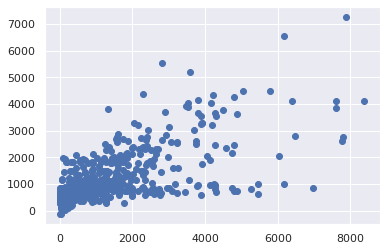

In [99]:
plt.scatter(y_price_test,y_pred_test)

#### Lasso Regression

In [100]:
y_predict_train = lasso_best.predict(X_price_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_price_train, 
y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_price_train, 
y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_price_train, 
y_predict_train)))

RMSE for training data is 998.7375895876561
MAE for training data is 654.5251253201782
MAPE for training data is 3.606013978788736


In [101]:
# Testing error

X_price_test = X_test.to_numpy()
y_price_test = y_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

y_pred_test = lasso_best.predict(X_price_test)

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_price_test, 
y_pred_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_price_test, 
y_pred_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_price_test, 
y_pred_test)))

RMSE for testing data is 1019.9600379532367
MAE for testing data is 654.7552351182652
MAPE for testing data is 4.2609906499353825


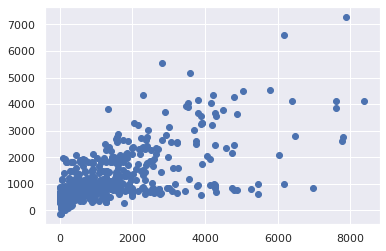

In [102]:
plt.scatter(y_price_test,y_pred_test)

Both RIDGE and LASSO, has higher value of MAE, MAPE, and RMSE for testing data than the training data, but not too much so we can claimed that both RIDGE and LASSO are not underfit. The reason why testing data is higher, because the model hasn’t seen the testing data before. But looking at the scale of the values in training and testing for RMSE it looks like we can generalized the model.

BAsed on the coefficients of the model, features that affected positively to product price are sellable_online [ product availability online ] and category [ product category ]. While other_colors and price_diff [ price different between current and old price ] affected negatively to product price.

Product that available online, has higher price probability than product that only sell offline, it means that IKEA needs to increase their online selling. It will also help increase their Sales of Goods with minimum Operational Cost.

IKEA needs to focused on creating product with minimalized color option, to help reduced production cost, and optimize product variaties based on customer needs.